# ICC Men's Cricket Tournaments Regression Analysis

This notebook performs regression analysis on the ICC Men's Cricket Tournaments dataset.

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("ICC Men Cricket Tournaments.csv")

# Display the first few rows
df.head()


,Sl No.,Year,ICC Event,Host(s),Final venue,Winners,Result,Scoreccard,Runner-up,Winning Captain,Total Teams
0,1,1975,World Cup,England,"Lord's, London",West Indies,West Indies won by 17 runs,WI: 291/8 (60 overs)\nAUS: 274 all out (58.4 o...,Australia,Clive Lloyd,8
1,2,1979,World Cup,England,"Lord's, London",West Indies,West Indies won by 92 runs,WI: 286/9 (60 overs)\nENG: 194 all out (51 overs),England,Clive Lloyd,8
2,3,1983,World Cup,England & Wales,"Lord's, London",India,India won by 43 runs,IND: 183 all out (54.4 overs)\nWI: 140 all out...,West Indies,Kapil Dev,8
3,4,1987,World Cup,India & Pakistan,"Eden Gardens, Kolkata",Australia,Australia won by 7 runs,AUS: 253/5 (50 overs)\nENG: 246/8 (50 overs),England,Allan Border,8
4,5,1992,World Cup,Australia & New Zealand,"Melbourne Cricket Ground, Melbourne",Pakistan,Pakistan won by 22 runs,PAK: 249/6 (50 overs)\nENG: 227 all out (49.2 ...,England,Imran Khan,9


In [16]:

# Display dataset information
df.info 

# Check for missing values
df.isnull().sum()

# Unique values in categorical columns
df.nunique()


Sl No.             30
Year               28
ICC Event           3
Host(s)            20
Final venue        23
Winners             8
Result             27
Scoreccard         30
Runner-up           8
Winning Captain    23
Total Teams         8
dtype: int64

In [18]:

# Encode categorical features using Label Encoding
label_encoders = {}
categorical_columns = ['ICC Event', 'Host(s)', 'Final venue', 'Winners', 'Runner-up', 'Winning Captain']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable (Predicting Total Teams based on other variables)
X = df[['Year', 'Host(s)', 'Final venue', 'Runner-up', 'Winning Captain']]
y = df['Total Teams']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24, 5), (6, 5), (24,), (6,))

In [20]:

# Train a Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)


Mean Absolute Error: 1.73
Mean Squared Error: 5.73
R-squared Score: -0.39


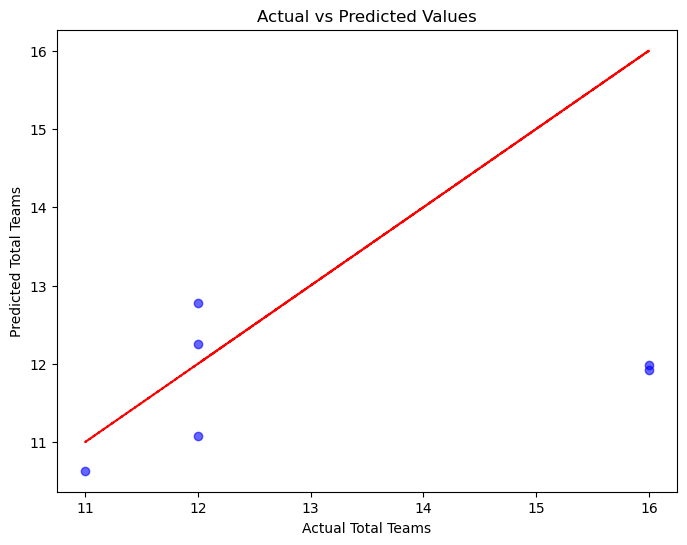

In [22]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Ideal line
plt.xlabel("Actual Total Teams")
plt.ylabel("Predicted Total Teams")
plt.title("Actual vs Predicted Values")
plt.show()
